# Distance and number of points clustering to identify outliers

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 
from folium import plugins
from folium.plugins import HeatMap
from collections import Counter
from datetime import datetime as dt
import hdbscan
import seaborn as sns
import sklearn.cluster as cluster

In [2]:
#loading the distance csv with the distance coverd by each vessel during the 1st week
df = pd.read_csv("distance.csv",delimiter=',')
df

,id,total_points,distance_km
0,228051000,58765,83.323806
1,227705102,51210,972.825385
2,259019000,51018,380.075127
3,311018500,48632,49.495652
4,227002330,39492,918.597706
5,351020000,36093,247.459957
6,227574020,27813,926.045434
7,234597000,20806,294.559094
8,228017700,15704,1816.639152
9,227635210,15420,482.362980


In [3]:
#filtering the data removing all trajecotries with lenght 1
temp=df.copy()
temp=temp[temp['total_points']!=1]
temp.tail()

,id,total_points,distance_km
597,235075103,2,71.506376
598,235091761,2,55.664232
599,240296000,2,0.058326
600,271000952,2,14.152164
601,228231800,2,19.235792


In [4]:
temp.describe()

,id,total_points,distance_km
count,6.020000e+02,602.000000,602.000000
mean,2.830474e+08,1279.355482,147.135570
std,1.147133e+08,5273.957680,191.083922
min,3.710030e+07,2.000000,0.001297
25%,2.275922e+08,5.000000,19.039467
50%,2.299804e+08,23.500000,85.078959
75%,2.733994e+08,395.000000,196.135582
max,1.000000e+09,58765.000000,1816.639152


In [5]:
#clusterign algorithm from scikit learn
def plot_clusters(data, algorithm, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    l=labels
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[1], data.T[0], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis()#.set_visible(False)
    frame.axes.get_yaxis()#.set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    return l

In [6]:
temp = temp[['total_points', 'distance_km']]
temp = temp.dropna(axis=0, subset=['total_points', 'distance_km'])
temp=temp.values
temp

array([[5.87650000e+04, 8.33238056e+01],
       [5.12100000e+04, 9.72825385e+02],
       [5.10180000e+04, 3.80075127e+02],
       ...,
       [2.00000000e+00, 5.83255847e-02],
       [2.00000000e+00, 1.41521643e+01],
       [2.00000000e+00, 1.92357921e+01]])

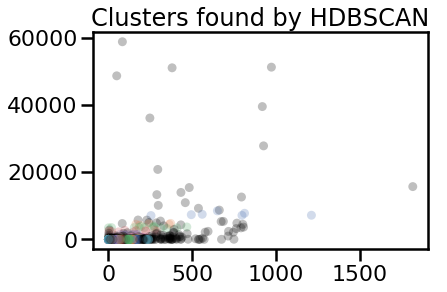

In [7]:
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

#applying HDBSCAN toteh dataset
x=plot_clusters(temp, hdbscan.HDBSCAN, (), {'min_cluster_size':5})

In [8]:
np.unique(x)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20], dtype=int64)

In [9]:
xs=pd.Series(x)
xs.value_counts()

-1     373
 12     24
 19     22
 18     20
 14     18
 15     16
 2      13
 8      12
 6      12
 3      10
 10     10
 17      9
 4       8
 11      7
 13      7
 5       7
 0       7
 20      6
 7       6
 9       5
 16      5
 1       5
dtype: int64

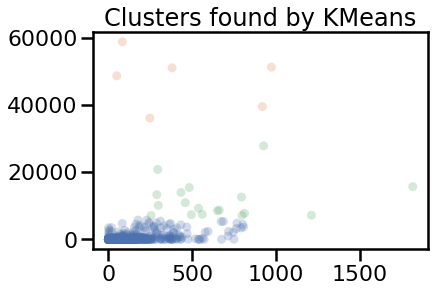

In [10]:
#applying KMeans to teh dataset
y=plot_clusters(temp, cluster.KMeans, (), {'n_clusters':3})

In [11]:
np.unique(y)

array([0, 1, 2])

In [12]:
ys=pd.Series(y)
ys.value_counts()

0    578
2     18
1      6
dtype: int64

In [19]:
df_ys=pd.DataFrame(ys.value_counts())
df_ys.columns=['Number of Points']
df_ys.index.name='Label'
df_ys

,Number of Points
Label,
0,578
2,18
1,6


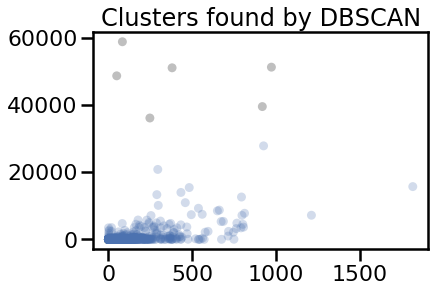

In [20]:
#applying DBSCAN 
z=plot_clusters(temp, cluster.DBSCAN, (), {'eps':10000})

In [21]:
np.unique(z)

array([-1,  0], dtype=int64)

In [22]:
zs=pd.Series(z)
zs.value_counts()

 0    596
-1      6
dtype: int64

In [23]:
#addign the labels of the clustering algorithm to the df

df_clust=df.copy()
df_clust=df_clust[df_clust['total_points']!=1]

#-1 outlier
df_clust['hdbscan']=x
#all but 0 outlier
df_clust['kmeans']=y
#-1 outlier
df_clust['dbscan']=z

In [24]:
df_clust

,id,total_points,distance_km,hdbscan,kmeans,dbscan
0,228051000,58765,83.323806,-1,1,-1
1,227705102,51210,972.825385,-1,1,-1
2,259019000,51018,380.075127,-1,1,-1
3,311018500,48632,49.495652,-1,1,-1
4,227002330,39492,918.597706,-1,1,-1
5,351020000,36093,247.459957,-1,1,-1
6,227574020,27813,926.045434,-1,2,0
7,234597000,20806,294.559094,-1,2,0
8,228017700,15704,1816.639152,-1,2,0
9,227635210,15420,482.362980,-1,2,0


In [25]:
kmean_df=df_clust.copy()
#filtering the data from the from the normal points keeping the outliers
kmean_df=kmean_df[kmean_df['kmeans']!=0]
kmean_df

,id,total_points,distance_km,hdbscan,kmeans,dbscan
0,228051000,58765,83.323806,-1,1,-1
1,227705102,51210,972.825385,-1,1,-1
2,259019000,51018,380.075127,-1,1,-1
3,311018500,48632,49.495652,-1,1,-1
4,227002330,39492,918.597706,-1,1,-1
5,351020000,36093,247.459957,-1,1,-1
6,227574020,27813,926.045434,-1,2,0
7,234597000,20806,294.559094,-1,2,0
8,228017700,15704,1816.639152,-1,2,0
9,227635210,15420,482.362980,-1,2,0


In [26]:
dbscan_df=df_clust.copy()
dbscan_df=dbscan_df[dbscan_df['dbscan']==-1]
dbscan_df

,id,total_points,distance_km,hdbscan,kmeans,dbscan
0,228051000,58765,83.323806,-1,1,-1
1,227705102,51210,972.825385,-1,1,-1
2,259019000,51018,380.075127,-1,1,-1
3,311018500,48632,49.495652,-1,1,-1
4,227002330,39492,918.597706,-1,1,-1
5,351020000,36093,247.459957,-1,1,-1


In [27]:
df_clust.describe()

,id,total_points,distance_km,hdbscan,kmeans,dbscan
count,6.020000e+02,602.000000,602.000000,602.000000,602.000000,602.000000
mean,2.830474e+08,1279.355482,147.135570,3.636213,0.069767,-0.009967
std,1.147133e+08,5273.957680,191.083922,6.955926,0.353423,0.099418
min,3.710030e+07,2.000000,0.001297,-1.000000,0.000000,-1.000000
25%,2.275922e+08,5.000000,19.039467,-1.000000,0.000000,0.000000
50%,2.299804e+08,23.500000,85.078959,-1.000000,0.000000,0.000000
75%,2.733994e+08,395.000000,196.135582,8.000000,0.000000,0.000000
max,1.000000e+09,58765.000000,1816.639152,20.000000,2.000000,0.000000


In [28]:
#using standard deviation to find the sigma limits for the total points
v=2
points_x_pos=df_clust['total_points'].mean()+v*df_clust['total_points'].std()
points_x_neg=df_clust['total_points'].mean()-v*df_clust['total_points'].std()
print(points_x_pos)
print(points_x_neg)

11827.27084174584
-9268.55987829069


In [29]:
#using standard deviation to find the sigma limits for the distance
dist_x_pos=df_clust['distance_km'].mean()+v*df_clust['distance_km'].std()
dist_x_neg=df_clust['distance_km'].mean()-v*df_clust['distance_km'].std()
print(dist_x_pos)
print(dist_x_neg)

529.3034132456912
-235.03227296889207


In [30]:
kmean_df.head()

,id,total_points,distance_km,hdbscan,kmeans,dbscan
0,228051000,58765,83.323806,-1,1,-1
1,227705102,51210,972.825385,-1,1,-1
2,259019000,51018,380.075127,-1,1,-1
3,311018500,48632,49.495652,-1,1,-1
4,227002330,39492,918.597706,-1,1,-1


In [31]:
d=dict()
#classify the outlier points in to stationary points 
#if the number of points is over the sigma limit and the distance below
#missign poins if the number of points is below the limits and the distance over
#otherwise the vessel was incorrectly cluster as outlier and is labeled as normal point
for i,r in kmean_df.iterrows():
    if r['total_points']>points_x_pos:
        if r['distance_km']<dist_x_pos:
            d[i]='stationary'
            continue
    if r['total_points']<points_x_pos:
        if r['distance_km']>dist_x_pos:
            d[i]='missing points'
            continue            
    if d.get(i)==None:
        d[i]='normal'

kmean_df['points_x_pos']=d.values()
kmean_df

,id,total_points,distance_km,hdbscan,kmeans,dbscan,points_x_pos
0,228051000,58765,83.323806,-1,1,-1,stationary
1,227705102,51210,972.825385,-1,1,-1,normal
2,259019000,51018,380.075127,-1,1,-1,stationary
3,311018500,48632,49.495652,-1,1,-1,stationary
4,227002330,39492,918.597706,-1,1,-1,normal
5,351020000,36093,247.459957,-1,1,-1,stationary
6,227574020,27813,926.045434,-1,2,0,normal
7,234597000,20806,294.559094,-1,2,0,stationary
8,228017700,15704,1816.639152,-1,2,0,normal
9,227635210,15420,482.362980,-1,2,0,stationary


In [32]:
#loading the vessels coordinates to create the trajectory maps
df_acc = pd.read_csv("vessel.csv",delimiter=',')

In [33]:
print(len(df_acc))
df_acc.head()

770289


,id,lat,lon,time,speedoverground,courseoverground,trueheading,weeks
0,245257000,48.382490,-4.465718,1443650402,0.1,13.1,36,20151001
1,227705102,48.382420,-4.496571,1443650403,0.0,262.7,511,20151001
2,228131600,48.092247,-4.644325,1443650404,8.5,263.7,511,20151001
3,228051000,48.381320,-4.485108,1443650405,0.0,295.0,511,20151001
4,227574020,48.383660,-4.495441,1443650406,0.1,248.6,511,20151001


In [34]:
df_blackhole=kmean_df[kmean_df['points_x_pos']=='missing points']
df_blackhole

,id,total_points,distance_km,hdbscan,kmeans,dbscan,points_x_pos
15,227002630,9261,537.283204,-1,2,0,missing points
16,227005550,8712,661.881074,-1,2,0,missing points
17,226177000,8499,650.439210,0,2,0,missing points
18,228037600,7769,812.370955,0,2,0,missing points
19,227730220,7474,559.772116,0,2,0,missing points
21,226318000,7191,1211.680164,0,2,0,missing points
22,228109000,7153,797.094153,0,2,0,missing points


In [35]:
df_stationary=kmean_df[kmean_df['points_x_pos']=='stationary']
df_stationary

,id,total_points,distance_km,hdbscan,kmeans,dbscan,points_x_pos
0,228051000,58765,83.323806,-1,1,-1,stationary
2,259019000,51018,380.075127,-1,1,-1,stationary
3,311018500,48632,49.495652,-1,1,-1,stationary
5,351020000,36093,247.459957,-1,1,-1,stationary
7,234597000,20806,294.559094,-1,2,0,stationary
9,227635210,15420,482.362980,-1,2,0,stationary
10,228064900,13973,432.753207,-1,2,0,stationary
11,227019400,13311,288.989592,-1,2,0,stationary


In [36]:
df_normal=kmean_df[kmean_df['points_x_pos']=='normal']
df_normal

,id,total_points,distance_km,hdbscan,kmeans,dbscan,points_x_pos
1,227705102,51210,972.825385,-1,1,-1,normal
4,227002330,39492,918.597706,-1,1,-1,normal
6,227574020,27813,926.045434,-1,2,0,normal
8,228017700,15704,1816.639152,-1,2,0,normal
12,228037700,12604,794.181334,-1,2,0,normal
13,227306100,10930,458.779442,-1,2,0,normal
14,234056000,10121,297.582337,-1,2,0,normal
20,228174600,7356,494.594600,0,2,0,normal
23,228186700,7097,254.145634,0,2,0,normal


In [37]:
fm = folium.Map(location=[48, -4.4],
                    zoom_start = 8) 

In [38]:
#add the trajectories of teh vessels on the amp

#missing poins
df1=df_acc.copy()

df1 = df1[df1['id']==226318000] # Reducing data size so it runs faster
df1 = df1[['lat', 'lon']]
df1 = df1.dropna(axis=0, subset=['lat','lon'])

points1=df1.values.tolist()
folium.PolyLine(points1, color="blue", weight=2.5, opacity=1).add_to(fm)

#stationary
df2=df_acc.copy()

df2 = df2[df2['id']==228051000] # Reducing data size so it runs faster
df2 = df2[['lat', 'lon']]
df2 = df2.dropna(axis=0, subset=['lat','lon'])

points2=df2.values.tolist()
folium.PolyLine(points2, color="red", weight=2.5, opacity=1).add_to(fm)

#normal
df3=df_acc.copy()

df3 = df3[df3['id']==227705102] # Reducing data size so it runs faster
df3 = df3[['lat', 'lon']]
df3 = df3.dropna(axis=0, subset=['lat','lon'])

points3=df3.values.tolist()
folium.PolyLine(points3, color="white", weight=2.5, opacity=1).add_to(fm)

fm.save("clust_map_outliers.html")